## Starter Map: Simple Dots on a Map Representing Every CPS School

In [1]:
import requests
import pandas as pd

In [2]:
# This url points to the 19/20 School Year location data
response = requests.get('https://data.cityofchicago.org/resource/tz49-n8ze.json')

In [10]:
data = response.json()
data

[{'the_geom': {'type': 'Point',
   'coordinates': [-87.55022236949607, 41.744849106383406]},
  'school_id': '400094',
  'school_nm': 'EPIC HS',
  'sch_addr': '8255 S HOUSTON AVE, 60617',
  'grade_cat': 'HS',
  'grades': '9, 10, 11, 12',
  'sch_type': 'Traditional',
  'x': '-87.55022237',
  'y': '41.74484911',
  ':@computed_region_rpca_8um6': '25',
  ':@computed_region_vrxf_vc4k': '42',
  ':@computed_region_6mkv_f3dw': '21202',
  ':@computed_region_bdys_3d7i': '505',
  ':@computed_region_43wa_7qmu': '37'},
 {'the_geom': {'type': 'Point',
   'coordinates': [-87.61223910523854, 41.801204166742274]},
  'school_id': '610587',
  'school_nm': 'DYETT ARTS HS',
  'sch_addr': '555 E 51ST ST, 60615',
  'grade_cat': 'HS',
  'grades': '9, 10, 11, 12',
  'sch_type': 'Traditional',
  'x': '-87.61223911',
  'y': '41.80120417',
  ':@computed_region_rpca_8um6': '10',
  ':@computed_region_vrxf_vc4k': '7',
  ':@computed_region_6mkv_f3dw': '21192',
  ':@computed_region_bdys_3d7i': '218',
  ':@computed_regi

In [4]:
print("There are {} data points in the API response.\nEach data point is a CPS school".format(len(data)))

There are 654 data points in the API response.
Each data point is a CPS school


In [9]:
# convert to dataframe to view more easily.
df = pd.DataFrame(data)
df.head()

,the_geom,school_id,school_nm,sch_addr,grade_cat,grades,sch_type,x,y,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,"{'type': 'Point', 'coordinates': [-87.55022236...",400094,EPIC HS,"8255 S HOUSTON AVE, 60617",HS,"9, 10, 11, 12",Traditional,-87.55022237,41.74484911,25,42,21202,505,37
1,"{'type': 'Point', 'coordinates': [-87.61223910...",610587,DYETT ARTS HS,"555 E 51ST ST, 60615",HS,"9, 10, 11, 12",Traditional,-87.61223911,41.80120417,10,7,21192,218,10
2,"{'type': 'Point', 'coordinates': [-87.66572105...",400111,LEARN - PERKINS,"1700 W 83RD ST, 60620",ES,"K, 1, 2, 3, 4, 5, 6, 7",Traditional,-87.66572106,41.74312177,59,70,21554,532,13
3,"{'type': 'Point', 'coordinates': [-87.70520632...",610568,PATHWAYS - AVONDALE HS,"3100 W BELMONT AVE, 60618",HS,"9, 10, 11, 12",Options,-87.70520632,41.93943321,39,22,21538,425,20
4,"{'type': 'Point', 'coordinates': [-87.63952072...",610027,KIPLING,"9351 S LOWE AVE, 60620",ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Traditional,-87.63952072,41.72362691,59,72,21554,631,13


For the starter map, I will only use name and latitude and longitude, and grade category.  
I will plot each point with a tool tip containing the school name, and color by category.


Text(0.5, 1.0, 'Distribution of Grade Category:\n Elementary and High School')

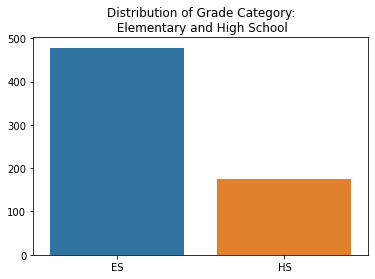

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
counts = (df.grade_cat.value_counts().values)
labels =  list(df.grade_cat.value_counts().index)

sns.barplot(x=labels, y=counts, ax=ax)
ax.set_title("Distribution of Grade Category:\n Elementary and High School")

There is other important data in the json, such as school type, which I will include in the geojson file for later use.

Text(0.5, 1.0, 'Distribution School Types in CPS')

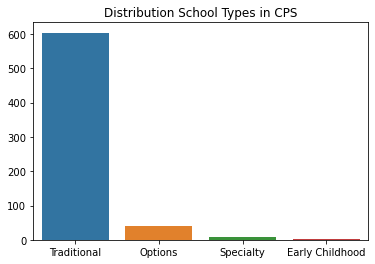

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
counts = list(df.sch_type.value_counts().values)
labels =  list(df.sch_type.value_counts().index)

sns.barplot(x=labels, y=counts, ax=ax)
ax.set_title("Distribution School Types in CPS")

## Create Geojson files

- [This](https://www.d3indepth.com/geographic/) is a nice rundown of Geojson files as related to D3.js.  
- I followed this [post](https://gis.stackexchange.com/questions/130963/write-geojson-into-a-geojson-file-with-python).

In [40]:
from geojson import Point, Feature, FeatureCollection, dump

In [41]:
points = [Point((float(school['x']),float(school['y']))) for school in data]
points[:2]

[{"coordinates": [-87.550222, 41.744849], "type": "Point"},
 {"coordinates": [-87.612239, 41.801204], "type": "Point"}]

In [42]:
features = []

for school in data:
    
    # Latitude and Longitude points
    point       = Point((float(school['x']),float(school['y'])))
    name        = school['school_nm']
    grade_cat   = school['grade_cat']
    school_id   = school['school_id']
    
    # Traditional or 
    school_type = school['sch_type']
    
    features.append(Feature(geometry=point, properties={'school_id':school_id,
                                                        'name': name, 
                                                        'grade_cat':grade_cat,
                                                        'school_type':school_type
                                                        
                                                       }))

In [43]:
feature_collection = FeatureCollection(features)

In [44]:
feature_collection[:2]

[{"geometry": {"coordinates": [-87.550222, 41.744849], "type": "Point"}, "properties": {"grade_cat": "HS", "name": "EPIC HS", "school_id": "400094", "school_type": "Traditional"}, "type": "Feature"},
 {"geometry": {"coordinates": [-87.612239, 41.801204], "type": "Point"}, "properties": {"grade_cat": "HS", "name": "DYETT ARTS HS", "school_id": "610587", "school_type": "Traditional"}, "type": "Feature"}]